# “Hello, world!”

Import Sionna:

In [2]:
import os
gpu_num = 0 # CPU를 사용하려면, ""로 하세요.
os.environ["CUDA_VISIBLE_DEVICES"] = f"{gpu_num}"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Import Sionna
try:
    import sionna
except ImportError as e:
    # 패키지가 아직 설치되지 않은 경우 Sionna를 설치하십시오.
    import os
    os.system("pip install sionna")
    import sionna
    
# 인라인 플롯을 위한 IPython "magic function"
%matplotlib inline
import matplotlib.pyplot as plt

먼저 [BinarySource](https://nvlabs.github.io/sionna/api/utils.html?highlight=binarysource#binarysource)를 만들어, constellation symbol에 매핑할 수 있는 비트 벡터의 랜덤 배치를 생성해 보겠습니다.

In [3]:
batch_size = 1000 # 생성하려는 symbol 수
num_bits_per_symbol = 4 # 16-QAM은 기호당 4비트를 갖습니다.
binary_source = sionna.utils.BinarySource()
b = binary_source([batch_size, num_bits_per_symbol])
b

<tf.Tensor: shape=(1000, 4), dtype=float32, numpy=
array([[0., 1., 1., 1.],
       [1., 0., 1., 1.],
       [1., 1., 0., 0.],
       ...,
       [1., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)>

다음으로, [Constellation](https://nvlabs.github.io/sionna/api/mapping.html#sionna.mapping.Constellation)을 만들고 시각화해 보겠습니다.

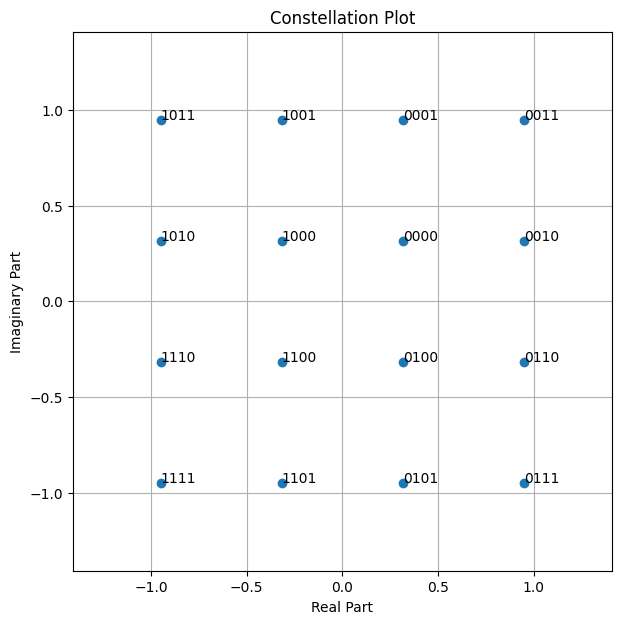

In [4]:
constellation = sionna.mapping.Constellation("qam", num_bits_per_symbol)
constellation.show();

이제 위에 표시된 비트 라벨링에 따라 b의 각 행을 constellation symbols에 매핑하는 [Mapper](https://nvlabs.github.io/sionna/api/mapping.html#mapper)가 필요합니다.

In [5]:
mapper = sionna.mapping.Mapper(constellation=constellation)
x = mapper(b)
x[:10]

<tf.Tensor: shape=(10, 1), dtype=complex64, numpy=
array([[ 0.9486833-0.9486833j],
       [-0.9486833+0.9486833j],
       [-0.3162278-0.3162278j],
       [-0.3162278+0.3162278j],
       [-0.9486833+0.3162278j],
       [ 0.9486833-0.3162278j],
       [-0.9486833-0.9486833j],
       [-0.3162278-0.3162278j],
       [-0.3162278-0.3162278j],
       [-0.3162278+0.9486833j]], dtype=complex64)>

이제 [AWGN channel](https://nvlabs.github.io/sionna/api/channel.html#sionna.channel.AWGN)을 통해 symbols을 전송하여, 상황을 좀 더 흥미롭게 만들어 보겠습니다.

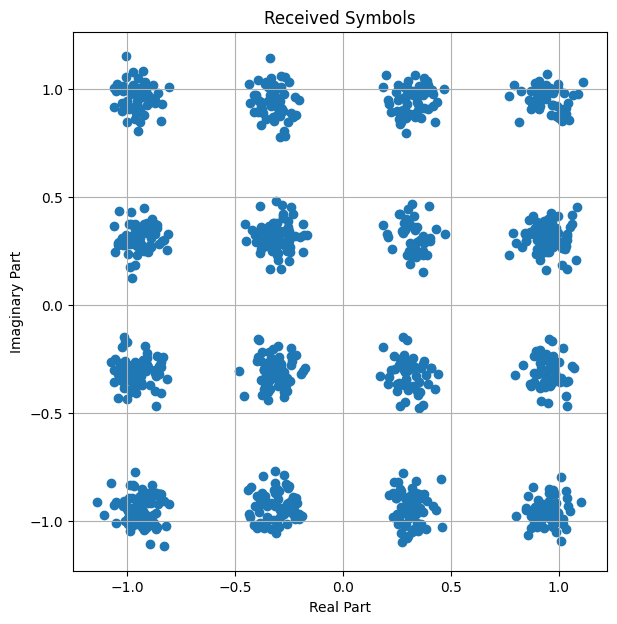

In [6]:
awgn = sionna.channel.AWGN()
ebno_db = 15 # 원하는 Eb/No (dB)
no = sionna.utils.ebnodb2no(ebno_db, num_bits_per_symbol, coderate=1)
y = awgn([x, no])

# 수신된 신호 시각화
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
plt.scatter(np.real(y), np.imag(y));
ax.set_aspect("equal", adjustable="box")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.grid(True, which="both", axis="both")
plt.title("Received Symbols");